In [ ]:
## Gaussian Process in details. 
## Application to supernova problems and much more.
## Add proper documentation for reader.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
plt.style.use('ggplot')

[[1.]
 [3.]
 [5.]
 [6.]
 [7.]
 [8.]]
[ 0.84147098  0.42336002 -4.79462137 -1.67649299  4.59890619  7.91486597]
<class 'numpy.ndarray'>


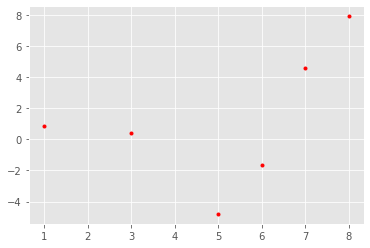

In [2]:
np.random.seed(1)
def f(x):
    return x*np.sin(x)

x = np.atleast_2d([1.,3.,5.,6.,7.,8.]).T
print (x)
y = f(x).ravel()
print (y), print (type(y))
plt.plot(x, y, 'r.')

In [3]:
a = np.atleast_2d(np.linspace(0,10,1000)).T
print (len(a))

1000


In [4]:
kernel = C(1., (1e-3, 1e3))*RBF(15, (1e-2, 1e2))
# k(x_1, x_2) = constant_value (x_1, x_2)
# value, (lower_bound, upper_bound)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [5]:
gp.fit(x,y)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=15),
                         n_restarts_optimizer=9)

In [6]:
y_pred, sigma = gp.predict(a, return_std=True)
print (len(y_pred), len(sigma))

1000 1000


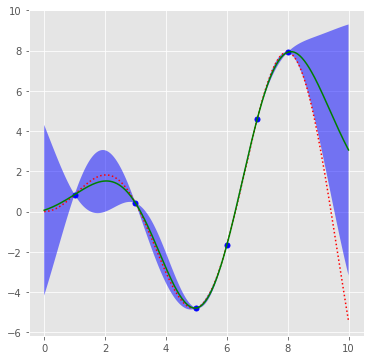

In [7]:
plt.figure(figsize = (6, 6))
plt.plot(a, f(a), 'r:', label=r'$f(x)=x\,\sin(x)$')
plt.plot(x, y, 'b.', markersize=10, label='Observation')
plt.plot(a, y_pred, 'g-', label = 'Prediction')
#plt.fill(np.concatenate([a, a[::-1]]), 
#         np.concatenate([(y_pred - 1.96*sigma),(y_pred + 1.96*sigma)[::-1]]),
#         alpha=0.7, fc='b', ec='None', label='95% confidence')
plt.fill(np.concatenate([a, a[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
#plt.fill_between(a, y_pred-(1.96*sigma), y_pred+(1.96*sigma))



In [8]:
# Data with errors
x = np.atleast_2d(np.linspace(0.1, 9.9, 20)).T
y = f(x).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
print (dy)
print (type(dy))
noise = np.random.normal(0, dy)
y += noise

[0.64038694 0.69810149 1.30074457 1.46826158 0.81342418 1.19232262
 1.37638915 1.39460666 0.58504421 0.53905478 0.66983042 1.3781425
 0.59834683 0.92110763 1.45788953 1.03316528 1.19187711 0.81551563
 1.18650093 1.33462567]
<class 'numpy.ndarray'>


In [9]:
gp = GaussianProcessRegressor(kernel=kernel, alpha = dy**2,
                             n_restarts_optimizer=10)

In [10]:
gp.fit(x, y)

GaussianProcessRegressor(alpha=array([0.41009543, 0.48734569, 1.69193643, 2.15579205, 0.66165889,
       1.42163322, 1.8944471 , 1.94492775, 0.34227673, 0.29058006,
       0.44867279, 1.89927676, 0.35801893, 0.84843926, 2.12544188,
       1.06743051, 1.42057105, 0.66506574, 1.40778445, 1.78122568]),
                         kernel=1**2 * RBF(length_scale=15),
                         n_restarts_optimizer=10)

In [11]:
y_pred, sigma = gp.predict(a, return_std=True)

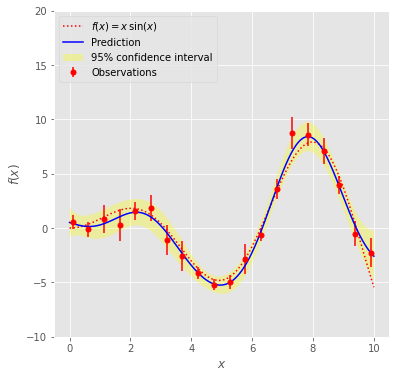

In [12]:
plt.figure(figsize=(6,6))
plt.plot(a, f(a), 'r:', label = r'$f(x)=x\,\sin(x)$')
plt.errorbar(x.ravel(), y, dy, fmt='r.', markersize=10, 
            label='Observations')
plt.plot(a, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([a, a[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma, 
                         (y_pred + 1.9600 * sigma)[::-1]]),
                         alpha=.3, fc='yellow', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')


In [13]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.optimize import fmin
from numpy.linalg import slogdet
from scipy.spatial.distance import cdist

## What is a GP?

### A Gaussian process is a collection of random variables, any finite number of which have a joint Gaussian distribution.

Consider a scalar variable $y$, drawn from a Gaussian distribution with mean $\mu$ and variance $\sigma^2$:

$$
p(y) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left[ - \frac{(y-\mu)^2}{2 \sigma^2} \right].
$$

As a short hand, we write: $y \sim \mathcal{N}(\mu,\sigma^2)$.

## References:

1. [Gaussian Processes for Machine Learning](http://www.gaussianprocess.org/gpml/)
2. [Fitting Gaussian Process Models in Python](https://blog.dominodatalab.com/fitting-gaussian-process-models-python/)
3. [Scikit-Learn](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html)
4. [Bivariate Normal Distribution](https://mathworld.wolfram.com/BivariateNormalDistribution.html)
5. [Quick Start to Gaussian Process Regression](https://towardsdatascience.com/quick-start-to-gaussian-process-regression-36d838810319)
6. [A Visual Exploration of Gaussian Processes](https://distill.pub/2019/visual-exploration-gaussian-processes/)

In [14]:
def gauss1D(x, mu, sig):
    return np.exp(-(x-mu)**2/(2*sig**2))/np.sqrt(2*np.pi)/sig

def pltgauss1D(mu, sig):
    
    x = np.r_[-4:4:101j]
    plt.figure(figsize=(7,5))
    plt.plot(x, gauss1D(x, mu, sig), 'k-')
    plt.axvline(mu, c='k',ls='-')
    plt.axvline(mu+sig, c='k',ls='--')
    plt.axvline(mu-sig, c='k',ls='--')
    plt.axvline(mu+2*sig,c='k',ls=':');
    plt.axvline(mu-2*sig,c='k',ls=':');
    plt.xlim(x.min(),x.max())
    plt.ylim(0,1)
    plt.xlabel(r'$y$')
    plt.ylabel(r'$p(y)$')

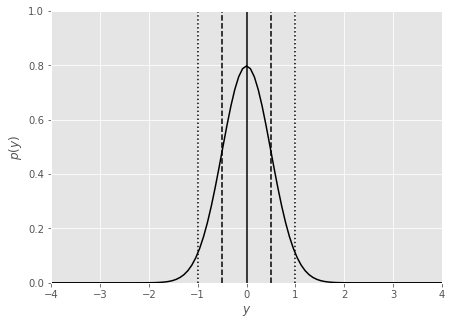

In [15]:
pltgauss1D(mu=0.0, sig=0.5)

The probability distribution function for a bivariate normal distribution is:
$$ p(x_1, x_2) = \frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho^2}}\exp{[-\frac{z}{2(1-\rho^2)}]}$$

where,

$$ z= \frac{(x_1-\mu_1)^2}{\sigma_1^2} - \frac{2\rho(x_1-\mu_1)(x_2-\mu_2)}{\sigma_1\sigma_2}+\frac{(x_2-\mu_2)^2}{\sigma_2^2}$$

and $$ \rho \equiv cor(x_1, x_2)=\frac{V_{12}}{\sigma_1\sigma_2}$$
$\rho$ is the correlation of $x_1$ \& $x_2$ and $V_{12}$ is the covariance.

Now let us consider a pair of variables $y_1$ and $y_2$, drawn from a *bivariate Gaussian distribution*. The *joint probability density* for $y_1$ and $y_2$ is:

$$
\left[ \begin{array}{l} y_1 \\ y_2 \end{array} \right] \sim \mathcal{N} \left(
\left[ \begin{array}{l} \mu_1 \\ \mu_2 \end{array}  \right] , 
\left[ \begin{array}{ll} 
\sigma_1^2 & C \\
C & \sigma_2^2 
\end{array}  \right] 
\right),
$$

where $C = {\rm cov}(y_1,y_2)$ is the *covariance* between $y_1$ and $y_2$.
The second term on the right hand side is the *covariance matrix*, $K$.

If we know the value of $y_2$, the probability density for $y_1$ collapses to the the *conditional distribution* of $y_1$ given $y_2$:

$$
p(y_1 \mid y_2) = \mathcal{N} \left( \mu_1 + C (y_2-\mu_2)/\sigma_2^2, \sigma_1^2-C^2\sigma_2^2 \right).
$$
$ \mu_{12} = \mu_1 + \rho(y_2-\mu_2)/\sigma_2^2$ and 
$ \sigma_{12} = \sqrt{\sigma_1^2-\rho^2\sigma_2^2}$

The *marginal distribution* of $y_1$ describes what we know about $y_1$ in the absence of any other information about $y_2$, and is simply:

$$
p(y_1)= \mathcal{N} (\mu_1,\sigma_1^2).
$$

If $K$ is diagonal, i.e. if $C=0$, $p(y_1 \mid y_2) = p(y_1)$. Measuring $y_2$ doesn't teach us anything about $y_1$. The two variables are *uncorrelated*. 
If the variables are *correlated* ($C \neq 0$), measuring $y_2$ does alter our knowledge of $y_1$: it modifies the mean and reduces the variance.

In [16]:
def gauss2D(x1, x2, mu1, mu2, sig1, sig2, rho):
    
    z = (x1-mu1)**2/sig1**2 + (x2-mu2)**2/sig2**2 - 2*rho*(x1-mu1)*(x2-mu2)/(sig1*sig2)
    expn = np.exp(-z/(2*(1-rho**2)))
    
    return expn/(2*np.pi*sig1*sig2*np.sqrt(1-rho**2))

def pltgauss2D(mu1, sig1, mu2, sig2, rho=0, show_cond=False):
    
    x1 = np.r_[-4:4:101j]
    x2 = np.r_[-4:4:101j]
    
    y1 = gauss1D(x1, mu1, sig1)
    y2 = gauss1D(x2, mu2, sig2)
    
    x1_2d, x2_2d = np.mgrid[-4:4:101j, -4:4:101j]
    y = gauss2D(x1_2d, x2_2d, mu1, mu2, sig1, sig2, rho)
    
    y2_o = -1
    mu12 = mu1 + rho*(y2_o-mu2)/sig2**2
    sig12 = np.sqrt(sig1**2 - rho**2*sig2**2)
    
    y12 = gauss1D(x1, mu12, sig12)
    # if rho=0, no correlation p(y1, y2) = p(y1)
    
    plt.figure(figsize=(7,5))
    ax1 = plt.subplot2grid((3,3),(1,0),colspan=2,rowspan=2,aspect='equal')
    v = np.array([0.02, 0.1, 0.3, 0.6]) * y.max()
    CS = plt.contour(x1, x2, y, v, colors = 'k')
    # --------------------------------------------------------------------- #
    # x, y, z= height values above which contour are drawn, v = levels 
    # v = determines the number and positions of the contour lines/regions
    if show_cond:
        plt.axhline(y2_o, c = 'r')
    plt.xlabel(r'$y_1$')
    plt.ylabel(r'$y_2$')
    plt.xlim(x1.min(),x1.max())
    ax1.xaxis.set_major_locator(plt.MaxNLocator(5, prune = 'both'))
    ax1.yaxis.set_major_locator(plt.MaxNLocator(5, prune = 'both'))
    # --------------------------------------------------------------------- #
    
    ax2 = plt.subplot2grid((3,3),(0,0),colspan=2,sharex=ax1)
    
    plt.plot(x1, y1, 'k-')
    if show_cond:
        plt.plot(x1, y12, 'r-')
    plt.ylim(0,0.8)
    plt.ylabel(r'$p(y_1)$')
    
    plt.setp(ax2.get_xticklabels(), visible=True)
    ax2.xaxis.set_major_locator(plt.MaxNLocator(5, prune = 'both'))
    ax2.yaxis.set_major_locator(plt.MaxNLocator(4, prune = 'upper'))
    plt.xlim(x1.min(),x1.max())
    # --------------------------------------------------------------------- #
    
    ax3 = plt.subplot2grid((3,3),(1,2),rowspan=2,sharey=ax1)
    plt.plot(y2, x2,'k-')
    
    if show_cond:
        plt.axhline(y2_o, c ='r')
    plt.ylim(x2.min(),x2.max());
    plt.xlim(0,0.8);
    plt.xlabel(r'$p(y_2)$')
    plt.setp(ax3.get_yticklabels(), visible=True)
    ax3.xaxis.set_major_locator(plt.MaxNLocator(4, prune = 'upper'))
    ax3.yaxis.set_major_locator(plt.MaxNLocator(5, prune = 'both'))
    plt.subplots_adjust(hspace=0.5,wspace=0.5)    
    
    # --------------------------------------------------------------------- #
    
    return None

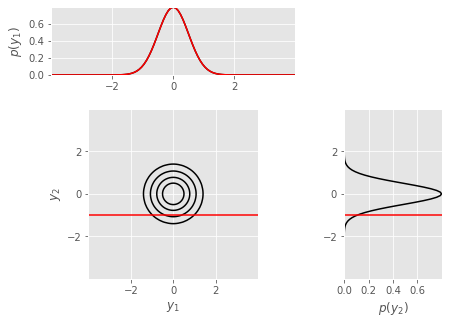

In [17]:
pltgauss2D(0, 0.5, 0, 0.5, rho=0.0, show_cond=True)

In [18]:
import ipywidgets as widgets
from ipywidgets import interact

interactive(children=(FloatSlider(value=0.0, description='$\\mu_{1}$', max=1.0, min=-1.0, step=0.2), FloatSlid…

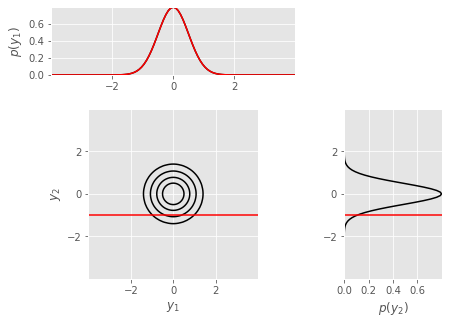

In [20]:
interact(pltgauss2D, 
         mu1=widgets.FloatSlider(min=-1,max=1,step=0.2,description=r'$\mu_{1}$', value=0),
         sig1=widgets.FloatSlider(min=-1,max=1,step=0.2,description=r'$\sigma_{1}$', value=0.5),
         mu2=widgets.FloatSlider(min=-1,max=1,step=0.2,description=r'$\mu_{2}$', value=0),
         sig2=widgets.FloatSlider(min=-1,max=1,step=0.2,description=r'$\sigma_{2}$', value=0.5),
         rho=widgets.FloatSlider(min=-0.8,max=0.8,step=0.4,description=r'$\rho$',value=0),
         show_cond=widgets.Checkbox(value=True,description='show conditional distribution'));

Now consider $N$ variables drawn from a multivariate Gaussian distribution:

$$
\boldsymbol{y} \sim \mathcal{N} (\boldsymbol{m},K)
$$

where $y = (y_1,y_2,\ldots,y_N)^T$, $\boldsymbol{m} = (m_1,m_2,\ldots,m_N)^T$ is the *mean vector*, and $K$ is an $N \times N$ positive semi-definite *covariance matrix*, with elements $K_{ij}={\rm cov}(y_i,y_j)$.

A Gaussian process(GP) is an extension of this concept to infinite $N$, giving rise to a probability distribution over functions. 

GP is a non-parametric, Bayesian approach to regression. It is a linear predictor. Not limited by any function form.

- GP calculates the probability distribution over all admissible functions that fit the data.
- Specify a prior function space.
- Calculate posterior using the training data.
- Calculate the predictive posterior distribution of our points of interest.

$$ f(x) \sim GP(m(x), k(x,x'))$$
$$ y \sim GP(m(x), k(x,x')+\delta_{ij}\sigma_n^2)$$
$$ \epsilon \sim \mathcal{N}(0, \sigma^2)$$

Form the Gaussian process prior, the collection of training points and test points are joint multivariate Gaussian distributed. The joint distribution of y and $f_{*}$ is
$$\begin{bmatrix} y \\ f_{*} \end{bmatrix} \sim \mathcal{N}(\begin{bmatrix} \mu \\ \mu_{*} \end{bmatrix}, \begin{bmatrix} k(X,X)+\sigma_n^2I & k(X,X_{*})\\ k(X_{*},X) & k(X_{*}, X_{*})  \end{bmatrix})$$
Here, k is the covariance matrix where its entries correspond to the covariance function evaluated at the observations. 

We can find the value of the function at the test point and its corresponding covariance by calculating the predictive posterior distribution:
$$ f^{*} = \mu^{*} + K(X_{*}, X)[K(X,X)+\sigma_n^2I]^{-1}(y-\mu)$$
$$ \epsilon^{*} = K(X^{*}, X^{*})[K(X,X)+\sigma_n^2I]^{-1}K(X,X^{*})$$

The predictions are $f^{*}$, and the variances are obtained from the diagonal of the covariance matrix $\epsilon^{*}$. 

The mean is a linear combination of the observations: the GP is a **linear predictor**.
It is also a linear combination of covariance functions, each centred on a training point:
$$
f^* = \sum_{i=1}^N \alpha_i k(x_i,x_*),
$$
where $\alpha_i = (K + \sigma^2I)^{-1} f_{i}$.

The predicted y value at 1.0 is 0.961:


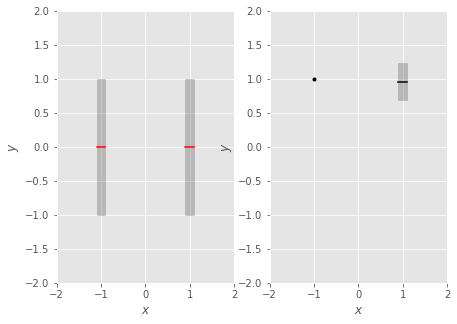

In [41]:
def sq_exp_Kernel(par, x1, x2):
    
    A, Gamma = par
    D2 = cdist(x1.reshape(len(x1), 1), x2.reshape(len(x2), 1), 
               metric= 'sqeuclidean')
    return A*np.exp(-Gamma*D2)

def mat32_kernel(par, x1, x2):
    A, Gamma = par
    R = cdist(x1.reshape(len(x1), 1), x2.reshape(len(x2), 1),
             metric='euclidean')
    arg = np.sqrt(3)*abs(R)*Gamma
    return A*(1+arg)*np.exp(-arg)

A = 1.0
Gamma = 0.01
x = np.array([-1,1])
K = sq_exp_Kernel([A, Gamma], x, x)
y = np.zeros(len(x))
sig = np.sqrt(np.diag(K))
plt.figure(figsize=(7,5))
plt.subplot(121)
for i in range(len(x)):
    plt.plot([x[i]-0.1, x[i]+0.1], [y[i], y[i]], 'r-')
    plt.fill_between([x[i]-0.1, x[i]+0.1],
                    [y[i]+sig[i], y[i]+sig[i]],
                    [y[i]-sig[i], y[i]-sig[i]], color='k',alpha=0.2)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# --------------------------------------------------------------------- #

def Pred_GP(CovFunc, CovPar, xobs, yobs, eobs, xtest):
    # Evaluate the covariance matrix for pairs of observed inputs
    K = CovFunc(CovPar, xobs, xobs)
    # add white noise
    K += np.identity(xobs.shape[0])*eobs**2
    #print (K)
    # Evaluate the covariance matrix for pairs of test inputs
    Kss = CovFunc(CovPar, xtest, xtest)
    # Evaluate the cross terms K(X_T, X)
    Ks = CovFunc(CovPar, xtest, xobs)
    
    # invert K
    Ki = inv(K)
    # evaluate the predictive mean
    m = np.dot(Ks, np.dot(Ki, yobs))
    
    # Evaluate the covariance 
    cov = Kss - np.dot(Ks, np.dot(Ki, Ks.T))
    
    return m, cov

# --------------------------------------------------------------------- #
# Plot the data
x_obs = np.array([-1])
y_obs =  np.array([1.0])
e_obs = 0.0001
plt.subplot(122)
plt.errorbar(x_obs, y_obs, yerr=e_obs, capsize=0, fmt='k.')
# --------------------------------------------------------------------- #
# Plot the prediction
x_pred = np.array([1])
y_pred, C = Pred_GP(sq_exp_Kernel, [A, Gamma], x_obs, y_obs, e_obs, x_pred)
sig = np.sqrt(np.diag(C))
for i in range(len(x_pred)):
    plt.plot([x_pred[i]-0.1, x_pred[i]+0.1], [y_pred[i], y_pred[i]], 'k-')
    plt.fill_between([x_pred[i]-0.1, x_pred[i]+0.1], [y_pred[i]+sig[i], y_pred[i]+sig[i]],
                    [y_pred[i]-sig[i], y_pred[i]-sig[i]], color='k', alpha=0.2)

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
print ("The predicted y value at %0.1f is %0.3f:"%(x_pred, y_pred))

Text(0, 0.5, '$y$')

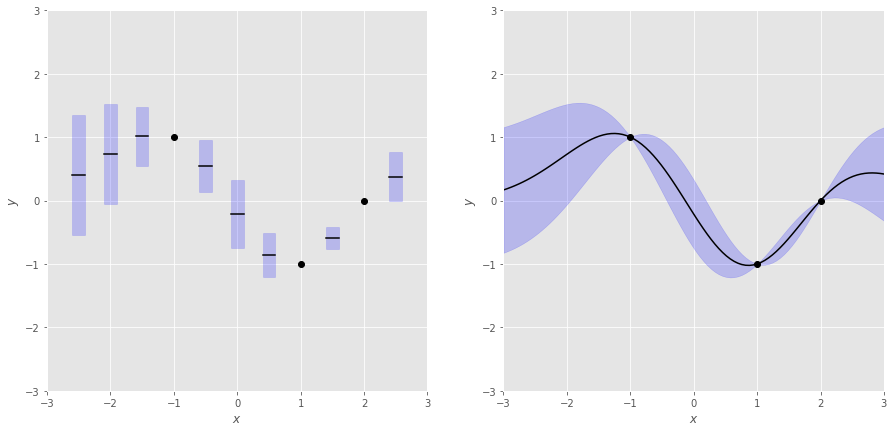

In [42]:
# Generalise this for N variables drawn 

xobs = np.array([-1, 1, 2])
yobs = np.array([1, -1, 0])
eobs = np.array([0.01, 0.01, 0.01])
plt.figure(figsize=(15,7))
plt.subplot(121)
A = 1 # Amount by which the function varies on these scales.
Gamma = 0.5 # scale over which the function typically varies.
x = np.array([-2.5,-2,-1.5,-0.5, 0.0, 0.5,1.5,2.5])
y_pred, cov = Pred_GP(sq_exp_Kernel, [A, Gamma], xobs, yobs, eobs, x)
sig = np.sqrt(np.diag(cov))

for i in range(len(x)):
    plt.plot([x[i]-0.1, x[i]+0.1],[y_pred[i], y_pred[i]],'k-')
    plt.fill_between([x[i]-0.1, x[i]+0.1],
                    [y_pred[i]+sig[i], y_pred[i]+sig[i]],
                    [y_pred[i]-sig[i], y_pred[i]-sig[i]],color='blue',alpha=0.2)

plt.errorbar(xobs, yobs, yerr=eobs, capsize=1, fmt='ko')

plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# --------------------------------------------------------------------- #

plt.subplot(122)
plt.errorbar(xobs, yobs, yerr=eobs, capsize=1, fmt='ko')
x = np.linspace(-3,3, 100)
y_pred, cov = Pred_GP(sq_exp_Kernel, [A, Gamma], xobs, yobs, eobs, x)
sig = np.sqrt(np.diag(cov))
plt.plot(x, y_pred, 'k-')
plt.fill_between(x, y_pred+sig, y_pred-sig, color='blue', alpha=0.2)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

## Covariance functions

The only requirement for the covariance function is that it should return a positive semi-definite covariance matrix.

The simplest covariance functions have two parameters: one input and one output variance (or scale). The form of the covariance function controls the degree of smoothness.

### Types of Covariance functions:
1. **Squared exponential**

The simplest, most widely used kernel is the squared exponential:
$$
k_{\rm SE}(x,x') = A \exp \left[ - \Gamma (x-x')^2 \right].
$$
This gives rise to *smooth* functions with variance $A$ and inverse scale (characteristic length scale) $A$ and output scale (amplitude) $l$.
2. **Matern 3/2**

The Matern 3/2 kernel
$$
k_{3/2}(x,x')= A \left( 1 + \frac{\sqrt{3}r}{l} \right) \exp \left( - \frac{\sqrt{3}r}{l} \right),
$$
where $r =|x-x'|$.
3. **Rational Quadratic**

is equivalent to a squared exponential with a powerlaw distribution of input scales
$$
k_{\rm RQ}(x,x') = A^2 \left(1 + \frac{r^2}{2 \alpha l} \right)^{-\alpha},
$$
where $\alpha$ is the index of the power law. 

This is useful to model data containing variations on a range of timescales with just one extra parameter.
4. **Periodic kernels**

Can be constructed by replacing $r$ in any of the above by a periodic function of $r$. For example, the cosine kernel:
$$
k_{\cos}(x,x') = A \cos\left(\frac{2\pi r}{P}\right),
$$
5. **Quasi-Periodic**
A Quasi-Periodic kernel can be constructed by multiplying a periodic kernel with a non-periodic one. The following is frequently used to model stellar light curves:
$$
k_{\mathrm{QP}}(x,x') = A \exp \left[  -\Gamma_1 \sin^2\left(\frac{\pi r}{P}\right)   -\Gamma_2 r^2 \right].
$$

In [43]:
def kernel_SE(par, X1, X2):
    
    # Squared Exponential
    p0 = 10.0**par[0]  # amplitude
    p1 = 10.0**par[1]  # scale
    D2 = cdist(X1, X2, 'sqeuclidean')
    K = p0 * np.exp(-p1*D2)
    
    return np.matrix(K)

def kernel_Mat32(par, X1, X2):
    
    # Matern 3/2 
    p0 = 10.0**par[0]  # amplitude
    p1 = 10.0**par[1]  # scale
    DD = cdist(X1, X2, 'euclidean')
    arg = np.sqrt(3)*abs(DD)/p1
    K = p0 * (1+arg)*np.exp(-arg)
    
    return np.matrix(K)

def kernel_RQ(par, X1, X2):
    
    # Rational Quadratic
    p0 = 10.0**par[0]  # Amplitude
    p1 = 10.0**par[1]  # scale
    alpha = par[2]    # order 
    D2 = cdist(X1, X2, 'sqeuclidean')
    K = (p0**2) * (1 + D2/(2*alpha*p1))**(-alpha)
    
    return np.matrix(K)

def kernel_Per(par, X1, X2):
    
    # Periodic Kernel
    p0 = 10.0**par[0]
    p1 = 10.0**par[1]
    period = par[2]
    DD = cdist(X1, X2, 'euclidean')
    K = p0 * np.exp(-p1*(np.sin(np.pi * DD/ period))**2)
    
    return np.matrix(K)

def kernel_QP(par, X1, X2):
    
    # Quasi-periodic kernel
    
    p0 = 10.0**par[0]
    p1 = 10.0**par[1]
    period = par[2]
    
    p3 = 10.0**par[3]
    DD = cdist(X1, X2, 'euclidean')
    D2 = cdist(X1, X2, 'sqeuclidean')
    K = p0 * np.exp(-p1*(np.sin(np.pi*DD/period))**2 - p3*D2)
    
    return np.matrix(K)

def add_whitenoise(K, lsig):
    
    sigma = 10.0**lsig
    N = K.shape[0]
    
    return K + (sigma**2 *np.identity(N))

def get_kernel(name):
    
    if name =='SE': return kernel_SE
    elif name == 'RQ': return kernel_RQ
    elif name == 'M32': return kernel_Mat32
    elif name == 'Per': return kernel_Per
    elif name == 'QP': return kernel_QP
    
    else:
        print ('Using Default kernel %s'% name)
        return kernel_SE

In [44]:
def pltsamples1(par0, par1, white_noise):
    
    x = np.r_[-5:5:201j]
    X = np.matrix([x]).T
    kernel = get_kernel('SE')
    
    K = kernel([par0, par1], X, X)
    K = add_whitenoise(K, white_noise) # adding white noise to kernel
    fig = plt.figure(figsize=(10,6))
    ax1 = plt.subplot2grid((1,3), (0,0), aspect='equal')
    plt.imshow(np.sqrt(K), interpolation='nearest', vmin=0, vmax=5)
    plt.title('Covariance Matrix')
    
    ax2 = plt.subplot2grid((1,3), (0,1), colspan=2)
    np.random.seed(2)
    for i in range(3):
        y = np.random.multivariate_normal(np.zeros(len(x)), K)
        plt.plot(x, y-2*i)
        
    plt.xlim(-5,5)
    plt.ylim(-8,5)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Samples from %s prior" % 'SE')
    plt.tight_layout()

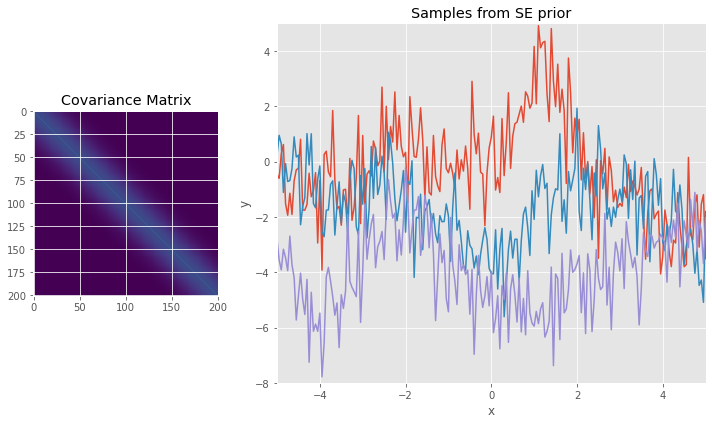

In [45]:
pltsamples1(par0=0.1, par1=0.001, white_noise=0.0)

In [46]:
interact(pltsamples1, 
         par0=widgets.FloatSlider(min=-1,max=1,step=0.5,description=r'$\log_{10} A$',value=0),
         par1=widgets.FloatSlider(min=-1,max=1,step=0.5,description=r'$\log_{10} \Gamma$',value=0),
         white_noise=widgets.FloatSlider(min=-2,max=0,step=1,description=r'$\log_{10} \sigma$',value=-2)
        );

interactive(children=(FloatSlider(value=0.0, description='$\\log_{10} A$', max=1.0, min=-1.0, step=0.5), Float…

In [47]:
def pltsamples2(par0=0.0, par1=0.0, par2=0.5, kernel_shortname='SE'):
    
    x = np.r_[-5:5:201j]
    X = np.matrix([x]).T
    kernel = get_kernel(kernel_shortname)
    K = kernel([par0, par1, par2], X, X)
    fig = plt.figure(figsize=(10,6))
    ax1 = plt.subplot2grid((1,3), (0, 0), aspect='equal')
    plt.imshow(np.sqrt(K),interpolation='nearest',vmin=0,vmax=5)
    plt.title('Covariance matrix')
    
    ax2 = plt.subplot2grid((1,3), (0,1), colspan=2)
    np.random.seed(2)
    
    for i in range(3):
        y = np.random.multivariate_normal(np.zeros(len(x)), K)
        plt.plot(x, y-2*i)
    plt.xlim(-5,5)
    plt.ylim(-8,5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Samples from %s prior' % kernel_shortname)
    plt.tight_layout()

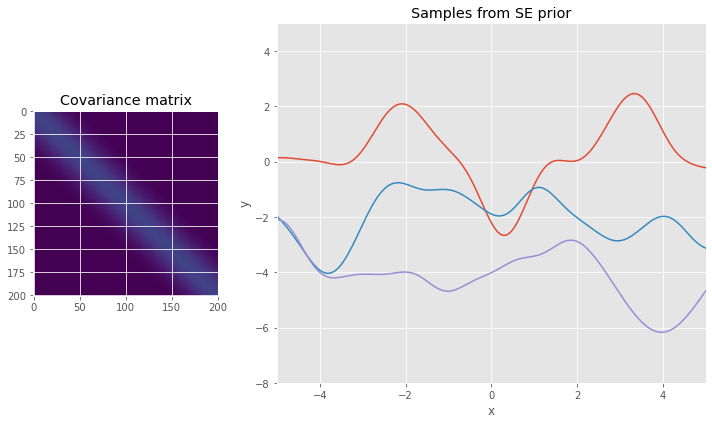

In [48]:
pltsamples2()

In [49]:
interact(pltsamples2,
         par0=widgets.FloatSlider(min=-1,max=1,step=0.5,description=r'$\log_{10} A$',value=0),
         par1=widgets.FloatSlider(min=-1,max=1,step=0.5,description=r'$\log_{10} \Gamma$',value=0),
         par2=widgets.FloatSlider(min=0.25,max=1,step=0.25,description=r'$\alpha$ (RQ only)',value=0.5),
        kernel_shortname=widgets.RadioButtons(options=['SE','M32','RQ'], value='SE', description='Kernel'),
        );

interactive(children=(FloatSlider(value=0.0, description='$\\log_{10} A$', max=1.0, min=-1.0, step=0.5), Float…

In [50]:
def pltsamples3(par2=2.0, par3=2.0, kernel_shortname='Per'):
    
    x = np.r_[-5:5:201j]
    X = np.matrix([x]).T
    kernel = get_kernel(kernel_shortname)
    K = kernel([0.0, 0.0, par2, par3], X, X)
    fig=plt.figure(figsize=(10,6))
    ax1 = plt.subplot2grid((1,3), (0, 0), aspect='equal')
    plt.imshow(np.sqrt(K),interpolation='nearest',vmin=0,vmax=5)
    plt.title('Covariance matrix')
    ax2 = plt.subplot2grid((1,3), (0,1),colspan=2)
    np.random.seed(2)
    for i in range(3):
        y = np.random.multivariate_normal(np.zeros(len(x)),K)
        plt.plot(x,y-2*i)
    plt.xlim(-5,5)
    plt.ylim(-8,5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Samples from %s prior' % kernel_shortname)
    plt.tight_layout()

In [51]:
style = {'description_width': 'initial'}
interact(pltsamples3, 
         par2=widgets.FloatSlider(min=1,max=3,step=1,description=r'$P$',value=2),
         par3=widgets.FloatSlider(min=-2,max=0,step=1,description=r'$\log\Gamma_2$ (Only QP)', style=style, value=-1),
         kernel_shortname=widgets.RadioButtons(options=['Per','QP'], value='QP',description='kernel')
        );

interactive(children=(FloatSlider(value=2.0, description='$P$', max=3.0, min=1.0, step=1.0), FloatSlider(value…

## GP review :

A Gaussian process is completely specified by its *mean function* and *covariance function*. 

A very common covariance function is the squared exponential, or radial basis function (RBF) kernel
$$
K_{ij}=k(x_i,x_j)=A \exp\left[ - \Gamma (x_i-x_j)^2 \right],
$$
which has 2 parameters: $A$ and $\Gamma$.

We then write the Gaussian process as
$$
y(x) \sim \mathcal{GP}(m(x), k(x,x'))
$$

#### The prior
The *joint distribution* of $\boldsymbol{y}$ given $\boldsymbol{x}$, $m$ and $k$ is
$$
\mathrm{p}(\boldsymbol{y} \mid \boldsymbol{x},m,k) = \mathcal{N}( \boldsymbol{m},K),
$$
where $\boldsymbol{m}=m(\boldsymbol{x})$ is the *mean vector*,
and $K$ is the *covariance matrix*, with elements $K_{ij} = k(x_i,x_j)$.

#### Test and training sets
Suppose we have an (observed) *training set* $(\boldsymbol{x},\boldsymbol{y})$. 

We are interested in some other *test set* of inputs $\boldsymbol{x}_*$.
The joint distribution over the training and test sets is
$$
\mathrm{p} \left( \left[ \begin{array}{l} \boldsymbol{y} \\ \boldsymbol{y}_* \end{array} \right] \right) 
= \mathcal{N} \left( \left[ \begin{array}{l} \boldsymbol{m} \\ \boldsymbol{m}_* \end{array} \right], 
\left[ \begin{array}{ll} K & K_* \\ K_*^T & K_{**} \end{array} \right] \right),
$$
where $\boldsymbol{m}_* = m(\boldsymbol{x}_*)$, $K_{**,ij} = k(x_{*,i},x_{*,j})$ and $K_{*,ij} = k(x_i,x_{*,j})$. 
#### The conditional distribution
The *conditional distribution* for the test set given the training set is:
$$ 
\mathrm{p} ( \boldsymbol{y}_* \mid \boldsymbol{y},k) = \mathcal{N} ( 
K_*^T K^{-1} \boldsymbol{y}, K_{**} - K_*^T K^{-1} K_* ).
$$
This relation assumes mean function =0 and no added white noise.
This is also known as the *predictive distribution*, because it can be use to predict future (or past) observations.
More generally, it can be used for *interpolating* the observations to any desired set of inputs.

#### Added white noise
Real observations always contain a component of *white noise*.

If the white noise variance $\sigma^2$ is constant, we can write 
$$
\mathrm{cov}(y_i,y_j)=k(x_i,x_j)+\delta_{ij} \sigma^2,
$$

and the conditional distribution becomes
$$ 
\mathrm{p} ( \boldsymbol{y}_* \mid \boldsymbol{y},k) = \mathcal{N} ( 
K_*^T (K + \sigma^2I)^{-1} \boldsymbol{y}, K_{**} - K_*^T (K + \sigma^2I)^{-1} K_* ).
$$

In real life, we may need to learn $\sigma$ from the data, alongside the other contribution to the covariance matrix. We assumed constant white noise, but it's trivial to allow for different $\sigma$ for each data point.

#### Single Point Prediction
Let us look more closely at the predictive distribution for a single test point $x_*$.

It is a Gaussian with mean
$$
y_* = \boldsymbol{k}_*^T (K + \sigma^2I)^{-1} \boldsymbol{y}
$$
and variance
$$
\mathbb{\epsilon}[y_*] = k(x_*,x_*) - \boldsymbol{k}_*^T (K + \sigma^2I)^{-1} \boldsymbol{k}_*,
$$
where $\boldsymbol{k}_*$ is the vector of covariances between the test point and the training points.

Notice the mean is a linear combination of the observations: the GP is a *linear predictor*.

It is also a linear combination of covariance functions, each centred on a training point:
$$
\overline{y}_* = \sum_{i=1}^N \alpha_i k(x_i,x_*),
$$
where $\alpha_i = (K + \sigma^2 I)^{-1} y_i$.

#### The likelihood
The *likelihood* of the data under the GP model is simply:
$$
\mathrm{p}(\boldsymbol{y} \,|\, \boldsymbol{x}) = \mathcal{N}(\boldsymbol{y} \, | \, \boldsymbol{0},K + \sigma^2 I).
$$

This is a measure of how well the model explains, or predicts, the training set.

The term *marginal* refers to marginalisation over the function values $\boldsymbol{f}$:
$$
\mathrm{p}(\boldsymbol{y} \,|\, \boldsymbol{x}) = \int \mathrm{p}(\boldsymbol{y} \,|\, \boldsymbol{f},\boldsymbol{x}) \, \mathrm{p}(\boldsymbol{f} \,|\, \boldsymbol{x}) \, \mathrm{d}\boldsymbol{f},
$$
where 
$$
\mathrm{p}(\boldsymbol{f} \,|\, \boldsymbol{x}) = \mathcal{N}(\boldsymbol{f} \, | \, \boldsymbol{0},K)
$$
is the *prior*, and 
$$
\mathrm{p}(\boldsymbol{y} \,|\, \boldsymbol{f},\boldsymbol{x}) = \mathcal{N}(\boldsymbol{y} \, | \, \boldsymbol{0},\sigma^2 \mathbb{I})
$$
is the *likelihood*.

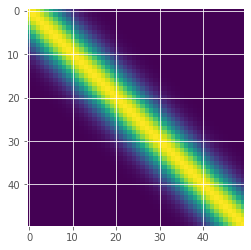

In [52]:
x_ = np.linspace(-5,5,50)
K = sq_exp_Kernel([1.,0.5] ,x_, x_)
plt.imshow(K, interpolation='none');

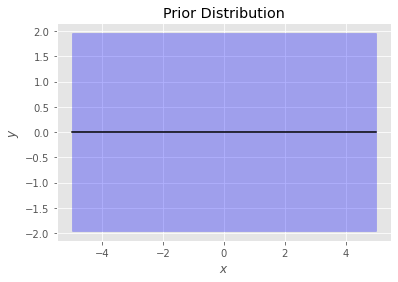

In [53]:
mean = np.zeros(len(x_))
sigma = np.sqrt(np.diag(K))
plt.plot(x_, mean, 'k-')
plt.fill_between(x_, mean-1.96*sigma, mean+1.96*sigma, color='blue', alpha=0.3)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Prior Distribution');

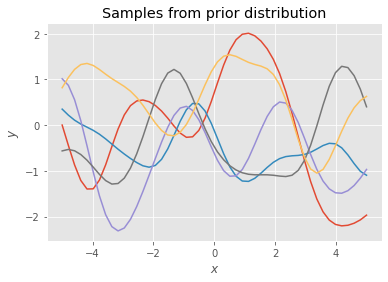

In [54]:
# Drawing samples from the distribution
np.random.seed(2)
samples = np.random.multivariate_normal(mean, K, 5)
plt.plot(x_, samples.T);
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Samples from prior distribution');

In [55]:
x_obs = np.array([-4, -2, 0, 1, 2])
y_obs = np.array([1.0, -1.0, -1.0, 0.7, 0.0])
e_obs = np.array([0.1, 0.15, 0.1, 0.2, 0.05])

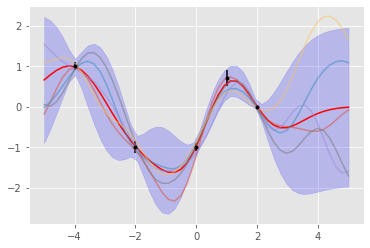

In [56]:
mean_, cov_ = Pred_GP(sq_exp_Kernel, [1.0, 0.5], x_obs, y_obs, e_obs, x_)
sigma_ = np.sqrt(np.diag(cov_))
samples_ = np.random.multivariate_normal(mean_, cov_, 5)
plt.errorbar(x_obs, y_obs, yerr=e_obs, capsize=0, fmt='k.')
plt.plot(x_, mean_, 'r-')
plt.fill_between(x_, mean_-1.96*sigma_, mean_+1.96*sigma_, color='blue', alpha=0.2);
plt.plot(x_, samples_.T, alpha=0.5);

$$
\mathrm{NLL} = - \log p(\mathbf{y}\,|\,\mathbf{m},K) = \frac{1}{2} \mathbf{y}^{\mathrm{T}} K^{-1} \mathbf{y} + \frac{1}{2} \log |K| + \frac{N}{2} \log 2 \pi
$$

In [57]:
def NLL_GP(p, CovFunc, x, y, e):
    # Evaluate the covariance matrix
    K = CovFunc(p, x, x)
    # Add the white noise term
    K += np.identity(x.shape[0])*e**2
    # invert it
    Ki = inv(K)
    term1 = 0.5 * np.dot(y, np.dot(Ki, y))
    term2 = 0.5 * slogdet(K)[1] # (sign, det)
    term3 = 0.5 * len(y) * np.log(2*np.pi)
    
    return term1+term2+term3

In [58]:
nll_gp = (NLL_GP([1., 0.5], sq_exp_Kernel, x_obs, y_obs, e_obs))
print ('The negative log-likelihood is: %.3f' %nll_gp)

The negative log-likelihood is: 7.366


In [59]:
p0 = [1.0, 1.0]
p1 = fmin(NLL_GP, p0, args=(sq_exp_Kernel, x_obs, y_obs, e_obs))
print (p1)

Optimization terminated successfully.
         Current function value: 6.193122
         Iterations: 89
         Function evaluations: 191
[ 0.67963054 36.1026566 ]


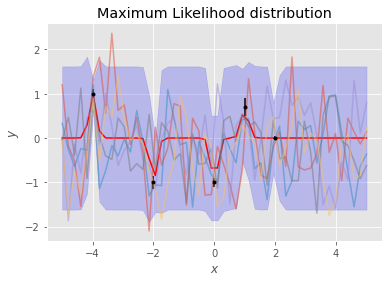

In [60]:
mean_2, cov_2 = Pred_GP(sq_exp_Kernel, p1, x_obs, y_obs, e_obs, x_)
sig_2 = np.sqrt(np.diag(cov_2))
samples_2 = np.random.multivariate_normal(mean_2, cov_2, 5)
plt.errorbar(x_obs, y_obs, yerr=e_obs, capsize=0, fmt='k.')
plt.plot(x_, mean_2, 'r-')
plt.fill_between(x_, mean_2-1.96*sig_2, mean_2+1.96*sig_2, color='blue', alpha=0.2);
plt.plot(x_, samples_2.T, alpha=0.5)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Maximum Likelihood distribution');

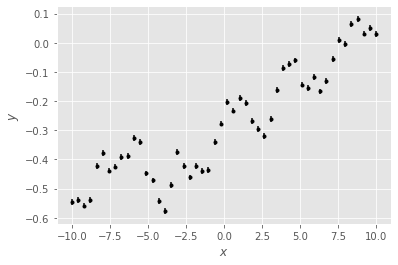

In [61]:
np.random.seed(2)
x_obs_1 = np.linspace(-10, 10, 50)
linear_trend = 0.03*x_obs_1 - 0.3
correlated_noise = np.random.multivariate_normal(np.zeros(len(x_obs_1)), 
                                        sq_exp_Kernel([0.005, 2.0], x_obs_1, x_obs_1), 1).flatten()
e_obs_1 = 0.01
white_noise = np.random.normal(0, e_obs_1, len(x_obs_1))
y_obs_1 = linear_trend + correlated_noise + white_noise
plt.errorbar(x_obs_1, y_obs_1, yerr=e_obs_1, fmt='k.', capsize=0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

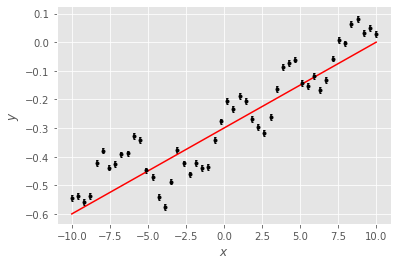

In [62]:
def LinearMean(p, x):
    
    return p[0] * x + p[1]

params = [0.03, -0.3]
mean_1 = LinearMean(params, x_obs_1)
plt.errorbar(x_obs_1, y_obs_1, yerr=e_obs_1, fmt='k.', capsize=1)
plt.plot(x_obs_1, mean_1, 'r-')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

In [63]:
def NLL_GP2(p, CovFunc, x, y, e, MeanFunc=None, nmp=2):
    
    if MeanFunc:
        pc = p[:nmp]
        pm = p[nmp:]
        r = y - MeanFunc(pm, x)
    else:
        pc = p[:nmp]
        r = y[:]
        
    K = CovFunc(pc, x, x)
    K += np.identity(x.shape[0]) * e**2
    Ki = inv(K)
    
    term1 = 0.5*np.dot(r, np.dot(Ki, r))
    term2 = 0.5*slogdet(K)[1]
    term3 = 0.5*len(r)*np.log(2*np.pi)
    
    return term1+term2+term3
    

In [64]:
params_1 = [0.005, 2.0, 0.03, -0.3]
nll_gp_1 = (NLL_GP2(params_1, sq_exp_Kernel, x_obs_1, y_obs_1, e_obs_1, MeanFunc=LinearMean, nmp=2))
print ('The negative log-likelihood is: %.3f' %nll_gp_1)

The negative log-likelihood is: -81.122


In [65]:
print ("##---------------------##")
print ("Results of optimization")
p2 = fmin(NLL_GP2, params_1, args=(sq_exp_Kernel, x_obs_1, y_obs_1, e_obs_1, LinearMean, 2))
print (p2)
print ("##---------------------##")

##---------------------##
Results of optimization
Optimization terminated successfully.
         Current function value: -82.420398
         Iterations: 66
         Function evaluations: 118
[ 0.0051356   2.22651813  0.0291714  -0.27757873]
##---------------------##


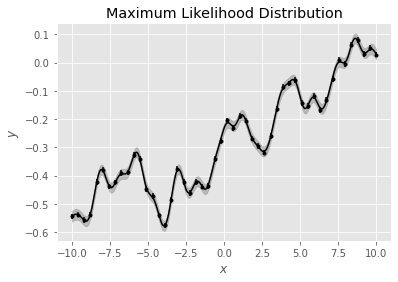

In [66]:
x_test = np.linspace(-10, 10, 300)
m_obs = LinearMean(p2[2:], x_obs_1)
r_obs = y_obs_1 - m_obs
mean_3, cov_3 = Pred_GP(sq_exp_Kernel, p2[:2], x_obs_1, r_obs, 
                       e_obs_1, x_test)
mean_3 += LinearMean(p2[2:], x_test)
sig_3 = np.sqrt(np.diag(cov_3))
plt.errorbar(x_obs_1, y_obs_1, yerr=e_obs_1, capsize=0, fmt='k.')
plt.plot(x_test, mean_3, 'k-')
plt.fill_between(x_test, mean_3-1.96*sig_3, mean_3+1.96*sig_3,
                color='k', alpha=0.2)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Maximum Likelihood Distribution');

In [67]:
p0_Mat32 = [0.005, 2.0, 0.03, -0.3]
nll_gp_mat32 = NLL_GP2(p0_Mat32, mat32_kernel, x_obs_1, y_obs_1,
                      e_obs_1, MeanFunc=LinearMean, nmp=2)
print ('The negative log-likelihood is: %.3f' %nll_gp_mat32)

The negative log-likelihood is: -76.641


In [68]:
print ("##---------------------##")
print ("Results of optimization")
p0_mat32 = fmin(NLL_GP2, params_1, args=(mat32_kernel, x_obs_1, y_obs_1, e_obs_1, LinearMean, 2))
print (p2)
print ("##---------------------##")

##---------------------##
Results of optimization
Optimization terminated successfully.
         Current function value: -82.556694
         Iterations: 110
         Function evaluations: 196
[ 0.0051356   2.22651813  0.0291714  -0.27757873]
##---------------------##


In [69]:
p_mean = fmin(NLL_GP2, params_1, args=(sq_exp_Kernel, x_obs_1, y_obs_1,
                                      e_obs_1, LinearMean, 2))
NLL_mean = NLL_GP2(p_mean, sq_exp_Kernel, x_obs_1, y_obs_1, 
                   e_obs_1, LinearMean, 2)
print (NLL_mean)

Optimization terminated successfully.
         Current function value: -82.420398
         Iterations: 66
         Function evaluations: 118
-82.42039780511706


In [70]:
p_no_mean = fmin(NLL_GP2, params_1, args = (sq_exp_Kernel, x_obs_1, y_obs_1,
                                           e_obs_1))
print (p_no_mean[:2])
NLL_no_mean = NLL_GP2(p_no_mean, sq_exp_Kernel, x_obs_1, y_obs_1, e_obs_1)
print (NLL_no_mean)

Optimization terminated successfully.
         Current function value: -50.028388
         Iterations: 94
         Function evaluations: 164
[0.06591807 1.07801546]
-50.02838830879161


In [71]:
N = len(x_obs_1)
BIC_mean = np.log(N) * len(p_mean) + 2*NLL_mean
print (BIC_mean)
BIC_no_mean = np.log(N) * len(p_no_mean) + NLL_no_mean
print (BIC_no_mean)

-149.19270358852154
-34.38029628707903


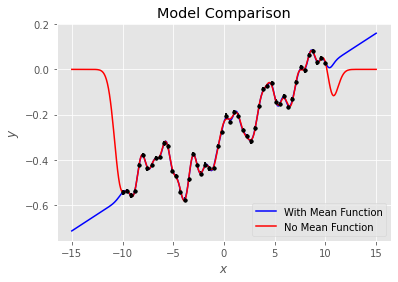

In [72]:
# Plot the data for model Comparison
x_test = np.linspace(-15, 15, 300)
plt.errorbar(x_obs_1, y_obs_1, yerr=e_obs_1, capsize=0, fmt='k.')
mobs_mf = LinearMean(p_mean[2:], x_obs_1)
r_obs_mf = y_obs_1 - mobs_mf
mean_mf, cov_mf = Pred_GP(sq_exp_Kernel, p_mean[:2], x_obs_1,
                         r_obs_mf, e_obs_1, x_test)
mean_mf += LinearMean(p_mean[2:], x_test)
sig_mf = np.sqrt(np.diag(cov_mf))

plt.plot(x_test, mean_mf, 'b-', label = 'With Mean Function')
plt.errorbar(x_obs_1, y_obs_1, yerr=e_obs_1, capsize=0, fmt='k.')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Model Comparison')

mean_nmf, cov_nmf = Pred_GP(sq_exp_Kernel, p_no_mean[:2], x_obs_1,
                           y_obs_1, e_obs_1, x_test)
sig_nmf = np.sqrt(np.diag(cov_nmf))

plt.plot(x_test, mean_nmf, 'r-', label = 'No Mean Function')
plt.legend(loc='lower right');
